# Task : To predict that whether a passenger survived or not.

In this task we need to predict that whether a passenger survived or not in titanic incident on the basis of other information given in the dataset.

* The target variable is Survived

#### Importing the various libraries to do the work on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./Downloads/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### To check dimension, description and pressence of null values in the dataset.

In [4]:
train.shape

(891, 12)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above we can observe that :
* dataset has 891 rows and 12 columns
* description of the dataset is giving mean, max value, min value of every column which contains continuous data.
* There is pressence of null values in Age, Cabin and Embarked columns in the dataset.

#### EDA
1. PassengerID

In [7]:
train['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

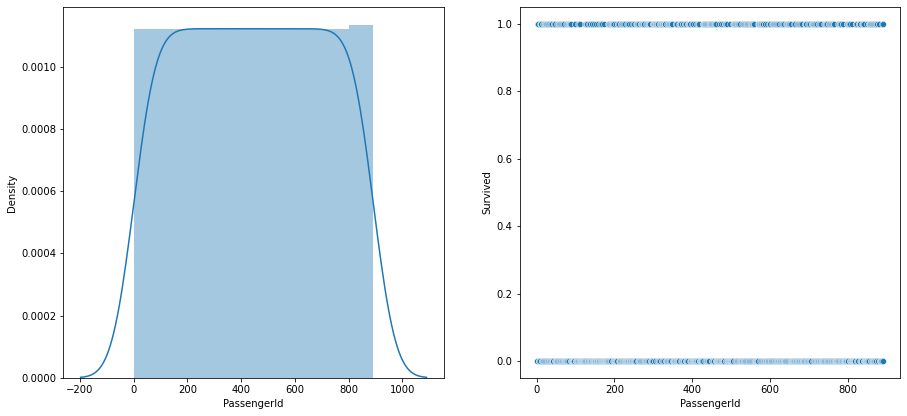

In [8]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['PassengerId'])
plt.xlabel('PassengerId')
plt.subplot(222)
sns.scatterplot(x= 'PassengerId', y= 'Survived', data= train)
plt.xlabel('PassengerId')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of PassengerId we can conclude that it is difficult to determine the skewness of the data and we also cannot determine the high density of the data from the distplot and from the scatterplot we cannot determine the survived or not survived of the passenger from this column. By looking at this particular column we have concluded that it does not affect the survival of passengers in any way so we can drop it from the dataset.

2. Pclass

In [9]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

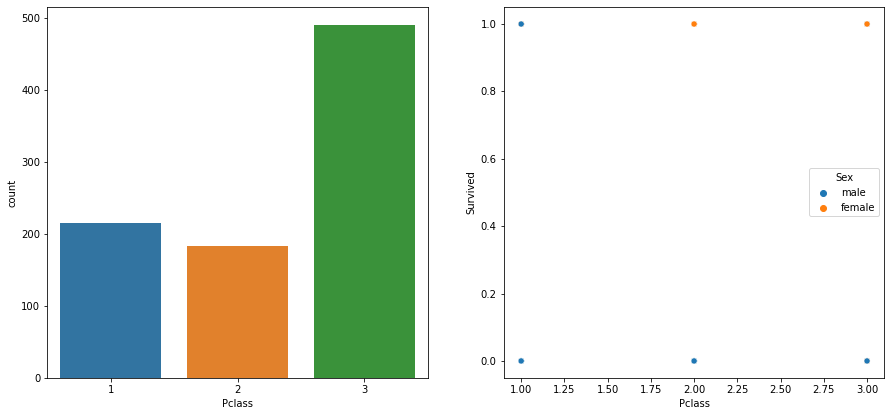

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Pclass'])
plt.xlabel('Pclass')
plt.subplot(222)
sns.scatterplot(x= 'Pclass', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Pclass we can conclude that most number of passenger were in Pclass 3 from the countplot and from the scatterplot we can conclude that in all the three Pclasses the male passengers does not survived and in Pclass 1 male passengers survived where as in Pclass 2 & 3 female passenger survived.

3. Name

In [11]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

From this column we can conclude that we cannot plot any graph for this column, but we can extract information to form another column like salutations (Mr., Mrs., etc)

In [12]:
train['Initial'] = train['Name'].str.extract('([A-Za-z]+)\.')

Now we can plot the graphs using this new information or column.

In [13]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [14]:
pd.crosstab(train['Initial'], train['Sex'], margins= True).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [15]:
train['Initial'] = train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],
                                           ['Mr','Mr','Mrs','Mr','Mr','Mr','Mrs','Mr','Miss','Miss','Miss','Mr','Mr'])

In [16]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

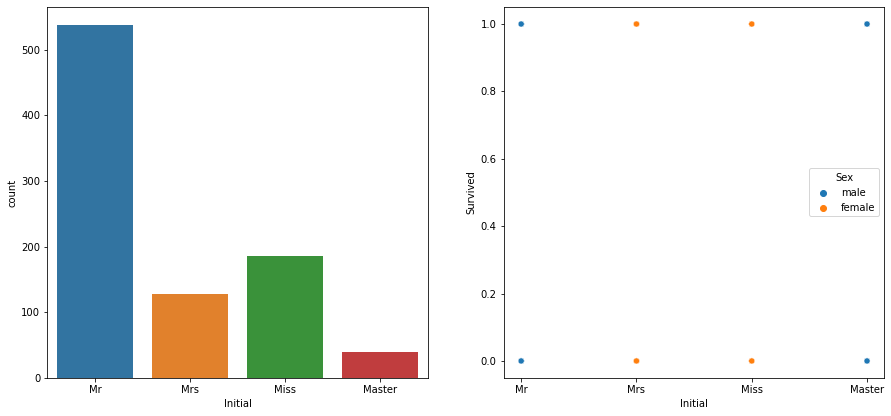

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Initial'])
plt.xlabel('Initial')
plt.subplot(222)
sns.scatterplot(x= 'Initial', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Initial')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Initial we can conclude that most passenger present in titanic have Mr salutation from the countplot and from the scatterplot we can conclude that passengers of every salutation survived as well as not survived.

4. Sex

In [18]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

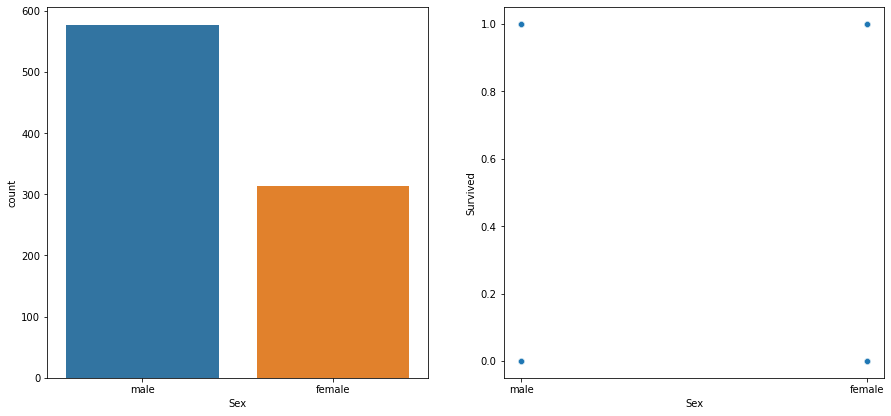

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Sex'])
plt.xlabel('Sex')
plt.subplot(222)
sns.scatterplot(x= 'Sex', y= 'Survived', data= train)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Sex we can conclude that most passengers on the titanic are of male sex from the countplot and from the scatterplot we can conclude that both sex male and female survived as well as not survived.

5. Age

In [20]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Before plotting the graph of this column we need to fill the null values.

In [21]:
train.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        33.022727
Mrs       35.981818
Name: Age, dtype: float64

In [22]:
train.loc[((train['Initial']== 'Master') & (train['Age'].isnull())), 'Age']= 5
train.loc[((train['Initial']== 'Miss') & (train['Age'].isnull())), 'Age']= 22
train.loc[((train['Initial']== 'Mr') & (train['Age'].isnull())), 'Age']= 33
train.loc[((train['Initial']== 'Mrs') & (train['Age'].isnull())), 'Age']= 36

In [23]:
train['Age'].isnull().sum()

0

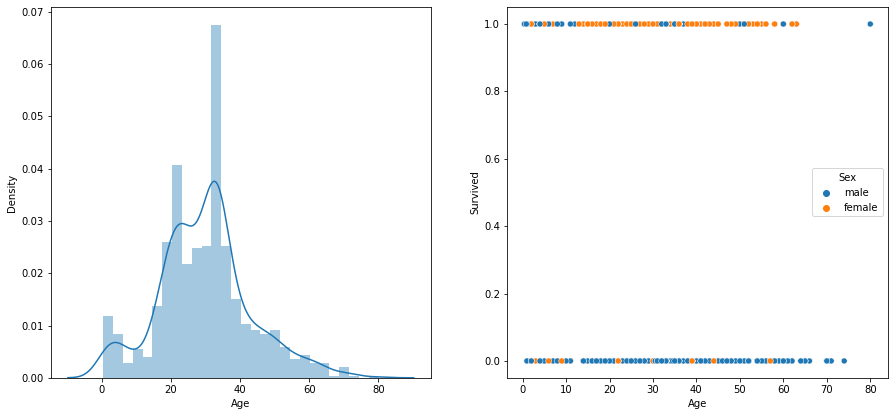

In [24]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.subplot(222)
sns.scatterplot(x= 'Age', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

By looking at both the graph of Age we can conclude that the data is positively skewed with having highest density around 35 or 37 from the distplot and from the scatterplot we can conclude that female survived more than male uptill the age of around 60 and beyond that age passengers died and all were the male passengers. Only one male passenger survived beyon the age of 60 and his age is shown in the plot at around 80.

6. SibSp and Parch

By using both the columns we can extract new information and then we can plot the graph on the basis of that information or column.

In [25]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [27]:
train['Family'] = train['SibSp'] + train['Parch']

In [28]:
train['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [29]:
train['Alone']= 0

In [30]:
train.loc[train['Family']== 0, 'Alone']= 1

In [31]:
train['Alone'].unique()

array([0, 1], dtype=int64)

In [32]:
pd.crosstab(train['Family'], train['Survived'], margins= True).T

Family,0,1,2,3,4,5,6,7,10,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


In [33]:
pd.crosstab(train['Survived'], train['Alone'], margins= True)

Alone,0,1,All
Survived,,,
0,175,374,549
1,179,163,342
All,354,537,891


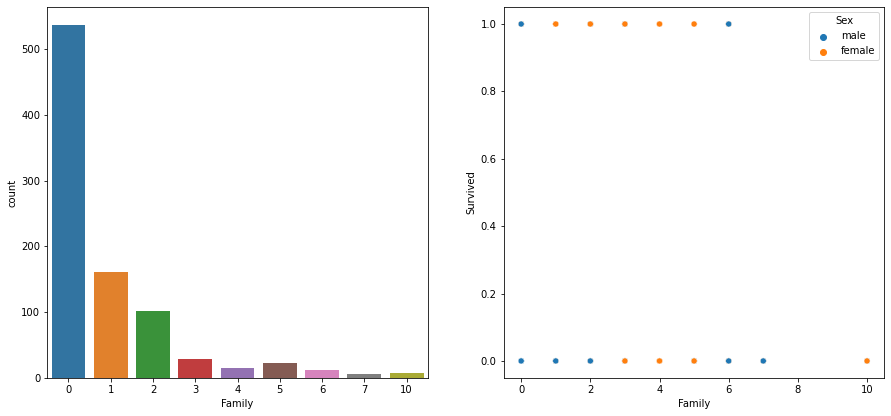

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Family'])
plt.xlabel('Family')
plt.subplot(222)
sns.scatterplot(x= 'Family', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Family')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Family we can conclude that most passengers on the ship have zero family members with them from the countplot and from the scatterplot most passengers with zero family members were male and they survived as well as not survived and the person with more than 6 family members did not survived whether the passenger is male or female, it does not matter.

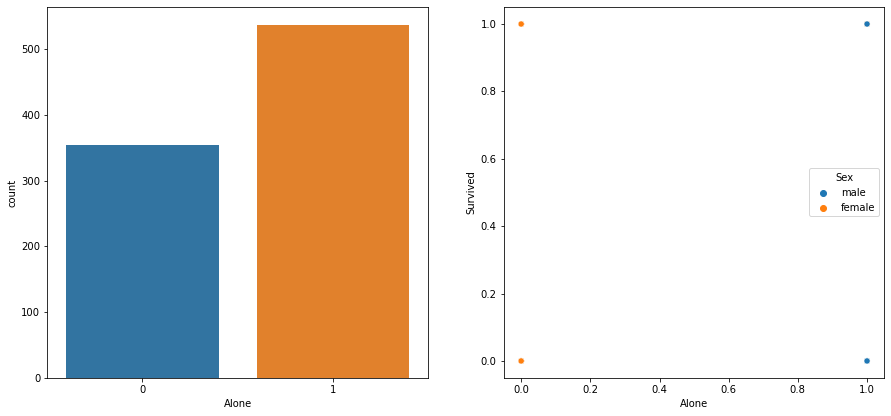

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Alone'])
plt.xlabel('Alone')
plt.subplot(222)
sns.scatterplot(x= 'Alone', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Alone we can conclude that most passengers on the ship were alone without any family member from the countplot and from the scatterplot we can conclude that all the alone passengers were male and no female passengers were alone.

7. ticket

Before we can do work on this column, we can observe and conclude that it does not affect the target variable in any way and we can drop it.

8. Fare

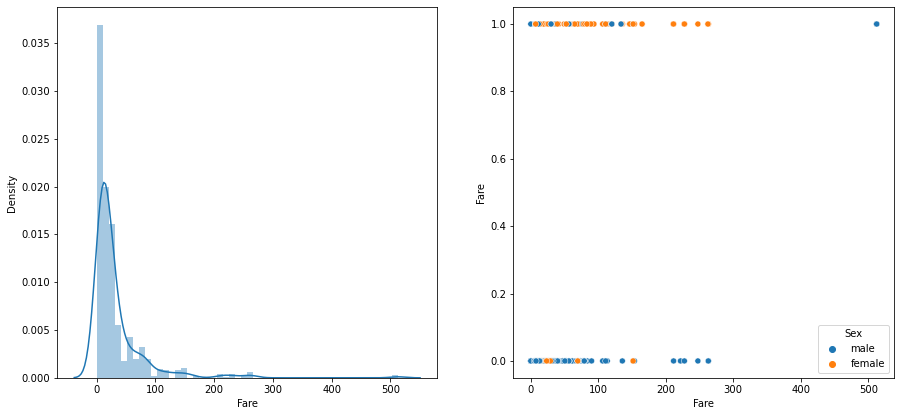

In [36]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Fare'])
plt.xlabel('Fare')
plt.subplot(222)
sns.scatterplot(x= 'Fare', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.show()

By looking at both the graphs of Fare we can conclude that the data is positively skewed with having highest density between 0 & 20 from the distplot and from the scatterplot we can conclude that most passengers spend on ticket's fare was below 300 and only one person spend above 300 for a ticket and that ticket was bought by a male and he survived. Also most female passengers survived and most male passengers did not survived.

9. Cabin

In [37]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Before we can plot the graph for this column, we need to fill the null values randomly as it has large quantity of null values and we cannot fill them with mode value as it will make the data bias. Also we need to refine the data to work on it more efficiently.

In [38]:
train['Cabin'] = train['Cabin'].fillna(method= 'bfill')

In [39]:
train['Cabin'].isnull().sum()

1

In [40]:
train['Cabin'] = train['Cabin'].fillna(method= 'ffill')

In [41]:
train['Cabin'].isnull().sum()

0

In [42]:
id = []
for i in train['Cabin']:
    i = i[0]
    id.append(i)

In [43]:
train['Cabin'] = pd.Series(id)

In [44]:
train['Cabin'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

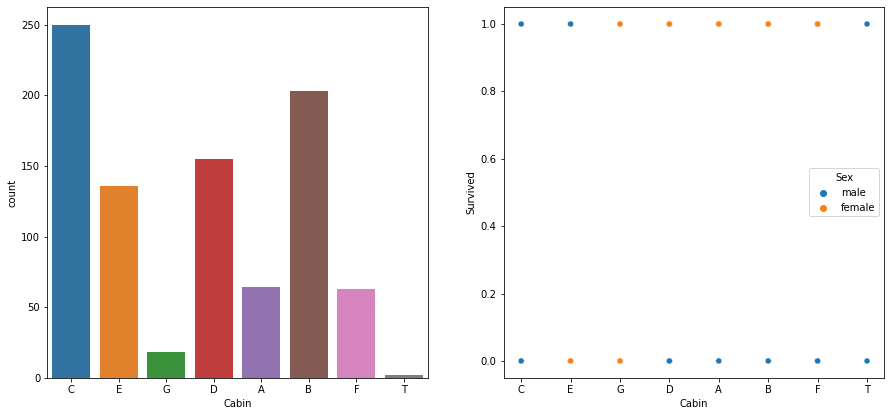

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Cabin'])
plt.xlabel('Cabin')
plt.subplot(222)
sns.scatterplot(x= 'Cabin', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Cabin')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Cabin we can conclude that most passengers on the ship were living in the cabins having C as their initial form the countplot and from the scatterplot we can conclude that in Cabin C & T only male passengers were residing in. In cabin G only female passengers were residing in. The cabin E is the only cabin where female passengers did not survived and male passengers survived. Except that cabin in every other cabin male passengers did not survived and female passengers survived.

10. Embarked

In [46]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Before plotting the graph for this column we need to fill the null values with mode value because only 2 values are null values and it will not create data bias.

In [47]:
train['Embarked'].mode()

0    S
dtype: object

In [48]:
train['Embarked'] = train['Embarked'].fillna('S')

In [49]:
train['Embarked'].isnull().sum()

0

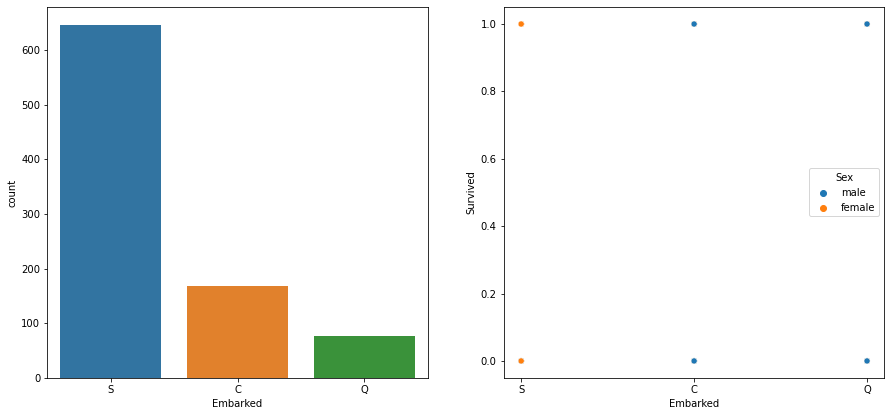

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Embarked'])
plt.xlabel('Embarked')
plt.subplot(222)
sns.scatterplot(x= 'Embarked', y= 'Survived', data= train, hue= 'Sex')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

By looking at both the graphs of Embarked we can conclude that most passengers boarded the ship from Embarked S from the countplot and from the scatterplot we can conclude that only female passengers boarded ship from embarked S and only male passengers boarded the ship from rest of the 2 embarked C and Q.

Now Before progressing anymore we need to drop the columns who are not contributing in the prediction of the survival rate of passengers.

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S,Mr,0,1


In [52]:
train = train.drop(['PassengerId','Name','SibSp','Parch','Ticket'], axis= 1)

We need to drop PassengerId and Ticket as they were not contributing anyway to predict the survival rate. We need to drop the Name because it was not contributing in the prediction and we also extracted the important information to form the more useful column (Initial). We drop the SibSp and Parch because we combine both of them in the new columns (Family & Alone), which are more efficient to work with.

#### Now we need to change the data types of each column to int or float data type.

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  891 non-null    object 
 7   Initial   891 non-null    object 
 8   Family    891 non-null    int64  
 9   Alone     891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [54]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [55]:
train['Sex'] = train['Sex'].replace(['male','female'],[0,1])

In [56]:
train['Cabin'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [57]:
train['Cabin'] = train['Cabin'].replace(['A','B','C','D','E','F','G','T'],[0,1,2,3,4,5,6,7])

In [58]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
train['Embarked'] = train['Embarked'].replace(['S','C','Q'],[0,1,2])

In [60]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [61]:
train['Initial'] = train['Initial'].replace(['Mr','Mrs','Miss','Master'],[0,1,2,3])

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Initial   891 non-null    int64  
 8   Family    891 non-null    int64  
 9   Alone     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


#### Now we need to split the data into train and test set and to apply GridSearchCV for suitable model and Hyperparameter tuning.

In [63]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

1. Logistic Regression

In [65]:
lr = LogisticRegression()

In [66]:
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5], 'max_iter': [100,110,120,130,140]}, scoring= 'accuracy', cv= 5)

In [67]:
lrf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'max_iter': [100, 110, 120, 130, 140]},
             scoring='accuracy')

In [68]:
lrf.best_params_

{'C': 5, 'max_iter': 100}

In [69]:
lrf.score(X_train, y_train)

0.8338323353293413

2. Decision Tree Classification

In [70]:
dt = DecisionTreeClassifier()

In [71]:
dtf = GridSearchCV(dt, param_grid= {'criterion': ['gini','entropy'], 'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [72]:
dtf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [73]:
dtf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [74]:
dtf.score(X_train, y_train)

0.842814371257485

3. Random Forest Classification

In [75]:
rf = RandomForestClassifier()

In [76]:
rff = GridSearchCV(rf, param_grid= {'criterion': ['gini','entropy'], 'n_estimators': [100,110,120,130,140], 'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [77]:
rff.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 110, 120, 130, 140]},
             scoring='accuracy')

In [78]:
rff.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 120}

In [79]:
rff.score(X_train, y_train)

0.8682634730538922

In [98]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_split= 2, min_samples_leaf= 2))

In [99]:
bcf = GridSearchCV(bc, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [100]:
bcf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=3,
                                                                               min_samples_leaf=2)),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [101]:
bcf.best_params_

{'max_features': 5, 'max_samples': 5, 'n_estimators': 50}

In [102]:
bcf.score(X_train, y_train)

0.7170658682634731

By comparing all the models we get to know that most efficient and effective model for this dataset is Random Forest Classification model which is giving the best accuracy for this dataset.

#### Now we need to remove outliers by applying scaling on the dataset.

In [103]:
scaler = StandardScaler()

In [104]:
scaledX_train = scaler.fit_transform(X_train)

In [105]:
scaledX_test = scaler.transform(X_test)

In [106]:
rf = RandomForestClassifier(criterion= 'gini', n_estimators= 120, max_depth= 5, min_samples_split= 3, min_samples_leaf= 2)

In [107]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [108]:
prediction = pd.DataFrame({'Actual': y_test, 'Predictions': pred})

In [109]:
prediction.head()

,Actual,Predictions
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1


#### Now checking the model by applying different metrics on this model

In [110]:
print('accuracy score : ', rf.score(scaledX_test, y_test))

accuracy score :  0.7982062780269058


In [111]:
print('precision score : ', metrics.precision_score(pred, y_test))

precision score :  0.6210526315789474


In [112]:
print('Cohen Kappa score : ', metrics.cohen_kappa_score(pred, y_test))

Cohen Kappa score :  0.5716846643049213


In [113]:
print('Confusion matrix : ')
metrics.confusion_matrix(pred, y_test)

Confusion matrix : 


array([[119,  36],
       [  9,  59]], dtype=int64)

#### By checking the cohen kappa score the model is pretty good to work on the dataset and confusion matrix is showing that model is giving 36 false postive result and 9 false negative result from the test set of the dataset.

#### Now we need to save the model for further use.

In [114]:
import pickle

In [115]:
save_rfc = pickle.dumps(rf)

#### Hence, we have done the prediction on the dataset using the above made model and also saved it for further use. So we have achieved our objective and have completed the task.